In [40]:
#prerequisites 
import json, requests

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [41]:
# plotting settings
%matplotlib inline

In [42]:
#sensor ids 
sensorID_list_freiburg = [533,928,1210,1224,1264,1288,1615,1667,1685,1699,1939,2289,2384,2388,2392,2408,2410,2438,2452,2456,2546,2564,2602,2662,2712,2728,2734,3525,3527,4206,4299,5335,5559,6590,6642,6924,7124,7243,7324,7381,7408,7446,7665,7725,7793,7799,7967,8070,8189,8213,9280,9958,11406,11425,12257,12302,13870,13891]

In [43]:
sensorID_list_freiburg.sort()
str( sensorID_list_freiburg )

'[533, 928, 1210, 1224, 1264, 1288, 1615, 1667, 1685, 1699, 1939, 2289, 2384, 2388, 2392, 2408, 2410, 2438, 2452, 2456, 2546, 2564, 2602, 2662, 2712, 2728, 2734, 3525, 3527, 4206, 4299, 5335, 5559, 6590, 6642, 6924, 7124, 7243, 7324, 7381, 7408, 7446, 7665, 7725, 7793, 7799, 7967, 8070, 8189, 8213, 9280, 9958, 11406, 11425, 12257, 12302, 13870, 13891]'

In [44]:
len( sensorID_list_freiburg )

58

### Fetch Freiburg data via API - coordinate + radius filer fetched results… 

In [45]:
url_for_geographic_radius_query = "http://api.luftdaten.info/v1/filter/area=47.9955,7.88,10"

In [46]:
data_from_geographic_filter_query = json.loads( requests.get( url_for_geographic_radius_query).text )

In [47]:
len( data_from_geographic_filter_query )

204

In [48]:
# test print a sensor… 
data_from_geographic_filter_query[0]

{'id': 1401856402,
 'location': {'altitude': '386.1',
  'country': 'DE',
  'id': 3765,
  'latitude': '47.9620',
  'longitude': '7.9520'},
 'sampling_rate': None,
 'sensor': {'id': 7446,
  'pin': '1',
  'sensor_type': {'id': 14, 'manufacturer': 'Nova Fitness', 'name': 'SDS011'}},
 'sensordatavalues': [{'id': 3004490806, 'value': '8.57', 'value_type': 'P1'},
  {'id': 3004490807, 'value': '4.83', 'value_type': 'P2'}],
 'timestamp': '2018-06-16 07:34:52'}

In [49]:
# Save specific values, like sensorIDs, different humidity sensor values 
# for counting matching sensors 
found_counter = 0

geographic_search_humidity_sensor__dht22__sensor_value = [0];
geographic_search_humidity_sensor__bme280__sensor_value = [0];
geographic_search__PM_sensor__sensorIDs  = [] 

# loop and find 
for sensor in data_from_geographic_filter_query:
    # filter only PM sensors ( made by Nova Fitness )
    if sensor['sensor']['sensor_type']['manufacturer'] == "Nova Fitness":   
        geographic_search__PM_sensor__sensorIDs.append( sensor['sensor']['id'] )
    # filter to only work with NON-PM sensors ( ie sensors NOT made by Nova Fitness ) 
    if sensor['sensor']['sensor_type']['manufacturer'] != "Nova Fitness":            
        for sensor_value in sensor['sensordatavalues']:
            # filter to only work with humidity values 
            if sensor_value['value_type'] == 'humidity':
                print("\t - found humidity value of "+str(sensor_value['value'])+" of sensor type "+sensor['sensor']['sensor_type']['name']+" location id = "+str( sensor['location']['id']) )
                # separate the different kinds of humidity sensors 
                if sensor['sensor']['sensor_type']['name'] == "DHT22":
                            geographic_search_humidity_sensor__dht22__sensor_value.append( float( sensor_value['value'] ) )
                if sensor['sensor']['sensor_type']['name'] == "BME280":
                            geographic_search_humidity_sensor__bme280__sensor_value.append( float( sensor_value['value'] ) )
    
          
        
# summarise after looop : 
print("-- found "+str( len( geographic_search_humidity_sensor__dht22__sensor_value))+"/"+str( len( geographic_search_humidity_sensor__bme280__sensor_value))+" matching dht22/bme280 sensors")

	 - found humidity value of 97.90 of sensor type DHT22 location id = 3765
	 - found humidity value of 70.10 of sensor type DHT22 location id = 1283
	 - found humidity value of 88.00 of sensor type DHT22 location id = 3502
	 - found humidity value of 90.80 of sensor type DHT22 location id = 1311
	 - found humidity value of 99.90 of sensor type DHT22 location id = 602
	 - found humidity value of 41.15 of sensor type BME280 location id = 4679
	 - found humidity value of 99.90 of sensor type DHT22 location id = 1238
	 - found humidity value of 68.40 of sensor type DHT22 location id = 7005
	 - found humidity value of 59.26 of sensor type BME280 location id = 5759
	 - found humidity value of 45.70 of sensor type DHT22 location id = 2690
	 - found humidity value of 99.90 of sensor type DHT22 location id = 988
	 - found humidity value of 99.90 of sensor type DHT22 location id = 2121
	 - found humidity value of 99.90 of sensor type DHT22 location id = 4029
	 - found humidity value of 85.33 of s

### Checking what the retrieved data looks like

In [50]:
data_from_geographic_filter_query[0]

{'id': 1401856402,
 'location': {'altitude': '386.1',
  'country': 'DE',
  'id': 3765,
  'latitude': '47.9620',
  'longitude': '7.9520'},
 'sampling_rate': None,
 'sensor': {'id': 7446,
  'pin': '1',
  'sensor_type': {'id': 14, 'manufacturer': 'Nova Fitness', 'name': 'SDS011'}},
 'sensordatavalues': [{'id': 3004490806, 'value': '8.57', 'value_type': 'P1'},
  {'id': 3004490807, 'value': '4.83', 'value_type': 'P2'}],
 'timestamp': '2018-06-16 07:34:52'}

In [51]:
# check how to find the location ID 
data_from_geographic_filter_query[0]['location']['id']

3765

In [52]:
# fetch the locationIDs of the geographic query
sensor_ids_from__data_from_geographic_filter_query = []

for sensor in data_from_geographic_filter_query:
    sensor_ids_from__data_from_geographic_filter_query.append( sensor['sensor']['id'] )

# sort and print the numbers 
sensor_ids_from__data_from_geographic_filter_query.sort()
str( sensor_ids_from__data_from_geographic_filter_query ) 

'[928, 929, 1224, 1224, 1224, 1225, 1225, 1225, 1264, 1264, 1265, 1265, 1615, 1615, 1616, 1616, 1667, 1667, 1668, 1668, 1685, 1685, 1686, 1686, 1699, 1699, 1700, 1700, 1975, 1975, 1976, 1976, 2001, 2001, 2002, 2002, 2289, 2289, 2438, 2438, 2439, 2439, 2452, 2452, 2453, 2453, 2456, 2456, 2466, 2466, 2546, 2546, 2546, 2547, 2547, 2547, 2564, 2564, 2565, 2565, 2602, 2602, 2602, 2603, 2603, 2603, 2712, 2712, 2728, 2728, 2729, 2729, 3525, 3525, 3526, 3526, 3527, 3527, 3528, 3528, 4206, 4206, 4207, 4214, 4214, 4215, 4215, 4299, 4299, 4300, 4300, 4742, 4742, 5335, 5335, 5336, 5336, 5595, 5595, 6924, 6924, 6924, 6925, 6925, 6925, 7124, 7124, 7125, 7125, 7243, 7243, 7304, 7304, 7305, 7305, 7324, 7324, 7325, 7325, 7381, 7381, 7382, 7382, 7408, 7408, 7409, 7409, 7446, 7446, 7446, 7447, 7447, 7447, 7565, 7565, 7566, 7566, 7725, 7725, 7726, 7726, 7793, 7793, 7794, 7794, 7799, 7799, 7800, 7800, 7967, 7967, 7968, 7968, 8070, 8070, 8071, 8071, 8189, 8189, 8190, 8190, 8213, 8213, 8214, 9280, 9280, 9280

In [53]:
# deduplicate the above array

# turn to pandas :) 
sensor_ids_from__data_from_geographic_filter_query = pd.Series( sensor_ids_from__data_from_geographic_filter_query )
sensor_ids_from__data_from_geographic_filter_query = list( sensor_ids_from__data_from_geographic_filter_query.drop_duplicates() ) 

# print deduplicated sensor location IDs 
str( sensor_ids_from__data_from_geographic_filter_query ) 

'[928, 929, 1224, 1225, 1264, 1265, 1615, 1616, 1667, 1668, 1685, 1686, 1699, 1700, 1975, 1976, 2001, 2002, 2289, 2438, 2439, 2452, 2453, 2456, 2466, 2546, 2547, 2564, 2565, 2602, 2603, 2712, 2728, 2729, 3525, 3526, 3527, 3528, 4206, 4207, 4214, 4215, 4299, 4300, 4742, 5335, 5336, 5595, 6924, 6925, 7124, 7125, 7243, 7304, 7305, 7324, 7325, 7381, 7382, 7408, 7409, 7446, 7447, 7565, 7566, 7725, 7726, 7793, 7794, 7799, 7800, 7967, 7968, 8070, 8071, 8189, 8190, 8213, 8214, 9280, 9281, 9432, 9958, 9959, 11406, 11407, 11418, 11419, 11425, 11426, 12257, 12258, 12302, 12303, 13870, 13871, 14131, 14314, 14315]'

In [54]:
# testing functionality to check whether a specific locationID is in the list of locationIDs from the geographic search
3604 in sensorID_list_freiburg

False

### Find which locationIDs are the same in the geographic Freiburg seach and the manually entered list of sensors in Freiburg

In [55]:
### NOTE NOTE NOTE : OOOOOPS - I might be comparing locationIDs with sensorIDs… no wonder there's no overlap… 

In [56]:
freiburg_sensor_data_amongst_geographic_sensor_data_search = []

In [57]:
for sensorID_from_geographic_search in sensor_ids_from__data_from_geographic_filter_query:
    #if sensor_data_item['location']['id'] in sensorID_list_freiburg:
    if sensorID_from_geographic_search in sensorID_list_freiburg:
        freiburg_sensor_data_amongst_geographic_sensor_data_search.append( sensorID_from_geographic_search )

In [58]:
overlapping_sensorIDs_btw_manually_entered_list_of_Freiburg_sensorIDs_and_sensorIDs_from_geographic_search_API_query = len( freiburg_sensor_data_amongst_geographic_sensor_data_search )

In [59]:
print(" -- overlapping sensor ids : |"+str(overlapping_sensorIDs_btw_manually_entered_list_of_Freiburg_sensorIDs_and_sensorIDs_from_geographic_search_API_query)+"| \n\t - manually entered freiburg sensor IDS / sensor IDS in geographic query "+str( len(sensorID_list_freiburg) )+"/"+str( len( sensor_ids_from__data_from_geographic_filter_query )) )

 -- overlapping sensor ids : |42| 
	 - manually entered freiburg sensor IDS / sensor IDS in geographic query 58/99


### Fetch Full data - via the "http://api.luftdaten.info/static/v1/data.json " api
### … of the 'manually entered' list of sensors in Freiburg 

In [60]:
data_from_data_json_api_call = json.loads(requests.get( "http://api.luftdaten.info/static/v1/data.json").text )

In [61]:
len( data_from_data_json_api_call )

20146

In [62]:
data_from_data_json_api_call[0]

{'id': 1401856367,
 'location': {'altitude': '321.7',
  'country': 'DE',
  'id': 4750,
  'latitude': '49.5060',
  'longitude': '10.4000'},
 'sampling_rate': None,
 'sensor': {'id': 9423,
  'pin': '7',
  'sensor_type': {'id': 9, 'manufacturer': 'various', 'name': 'DHT22'}},
 'sensordatavalues': [{'id': 3004490734,
   'value': '26.70',
   'value_type': 'temperature'},
  {'id': 3004490735, 'value': '44.90', 'value_type': 'humidity'}],
 'timestamp': '2018-06-16 07:34:52'}

#### Extract fuller data from data.json data… for the Freiburg location id list ids

In [63]:
# store found entries with 'correct' location_ids here ( they could be all manner of sensors )
fuller_data_for_freiburg_locs_from_data_json_api = []

# store matching non-particle matter entries.
freiburg_sensors_non_particle_matter_entries = []

# all entries in freiburg
freiburg_sensors__all_entries = []

In [64]:
for entry in data_from_data_json_api_call:
    curr_loc_id = entry['location']['id']
    if curr_loc_id in sensorID_list_freiburg:
        fuller_data_for_freiburg_locs_from_data_json_api.append( curr_loc_id )
        
        # make list of all freiburg sensor list data
        freiburg_sensors__all_entries.append( entry )
        
        # check and note the non-Particle Matter entries
        if entry['sensor']['sensor_type']['manufacturer'] != "Nova Fitness":
            freiburg_sensors_non_particle_matter_entries.append( entry )

In [65]:
print( "Freiburg entries : "+str( len( fuller_data_for_freiburg_locs_from_data_json_api ) ) )
print( "Non-particle matter sensors in Freiburg : "+str( len( freiburg_sensors_non_particle_matter_entries ) )  )

Freiburg entries : 85
Non-particle matter sensors in Freiburg : 36


In [66]:
data_from_data_json_api_call[:20]

[{'id': 1401856367,
  'location': {'altitude': '321.7',
   'country': 'DE',
   'id': 4750,
   'latitude': '49.5060',
   'longitude': '10.4000'},
  'sampling_rate': None,
  'sensor': {'id': 9423,
   'pin': '7',
   'sensor_type': {'id': 9, 'manufacturer': 'various', 'name': 'DHT22'}},
  'sensordatavalues': [{'id': 3004490734,
    'value': '26.70',
    'value_type': 'temperature'},
   {'id': 3004490735, 'value': '44.90', 'value_type': 'humidity'}],
  'timestamp': '2018-06-16 07:34:52'},
 {'id': 1401856368,
  'location': {'altitude': '190.7',
   'country': 'DE',
   'id': 7149,
   'latitude': '51.2800',
   'longitude': '9.4280'},
  'sampling_rate': None,
  'sensor': {'id': 14138,
   'pin': '7',
   'sensor_type': {'id': 9, 'manufacturer': 'various', 'name': 'DHT22'}},
  'sensordatavalues': [{'id': 3004490736,
    'value': '22.60',
    'value_type': 'temperature'},
   {'id': 3004490737, 'value': '53.90', 'value_type': 'humidity'}],
  'timestamp': '2018-06-16 07:34:52'},
 {'id': 1401856369,
  

In [67]:
freiburg_sensors__all_entries[:20]

[{'id': 1401857286,
  'location': {'altitude': '39.8',
   'country': 'DE',
   'id': 3527,
   'latitude': '52.3760',
   'longitude': '8.9900'},
  'sampling_rate': None,
  'sensor': {'id': 6973,
   'pin': '1',
   'sensor_type': {'id': 14,
    'manufacturer': 'Nova Fitness',
    'name': 'SDS011'}},
  'sensordatavalues': [{'id': 3004492696, 'value': '7.13', 'value_type': 'P1'},
   {'id': 3004492697, 'value': '5.40', 'value_type': 'P2'}],
  'timestamp': '2018-06-16 07:35:07'},
 {'id': 1401857328,
  'location': {'altitude': '39.8',
   'country': 'DE',
   'id': 3527,
   'latitude': '52.3760',
   'longitude': '8.9900'},
  'sampling_rate': None,
  'sensor': {'id': 6974,
   'pin': '7',
   'sensor_type': {'id': 9, 'manufacturer': 'various', 'name': 'DHT22'}},
  'sensordatavalues': [{'id': 3004492784,
    'value': '22.30',
    'value_type': 'temperature'},
   {'id': 3004492785, 'value': '99.90', 'value_type': 'humidity'}],
  'timestamp': '2018-06-16 07:35:08'},
 {'id': 1401857376,
  'location': {'

#### Check the values of the found humidity sensors 

In [68]:
humidity_values = [0]  
humidity_values__dht22 = [0]
humidity_values__bme280 = [0]

# to keep track of PM sensor values 
last_PM_sensor__sensor_ID = 0 

# fetch values of humidity sensor readings + give output 
counter = 0 
for sensor in freiburg_sensors__all_entries:
    print("- checking sensor : "+str(  sensor['sensor']['sensor_type'] )+" num : "+str(counter)+"/"+str( len(freiburg_sensors_non_particle_matter_entries) ) )
    for sensor_value in sensor['sensordatavalues']:
        """
        if sensor['sensor']['sensor_type']['name'] == 'SDS011':
                print("- found P1 sensor with value of "+str(sensor_value['value'])+" of sensor type "+sensor['sensor']['sensor_type']['name']+" LOCATION id = "+str( sensor['location']['id'])+" ++ sensor id "+str( sensor['id'] ) )
        if sensor_value['value_type'] == 'humidity':
        """
        # if humidity sensor, then store the sensor id num - for comparison later
        if sensor['sensor']['sensor_type']['name'] == 'SDS011':
            last_PM_sensor__sensor_ID = sensor['sensor']['id']
            
        print("\t -fnd sensorValue of "+str(sensor_value['value'])+" of sensor/Type "+str( sensor['sensor']['sensor_type']['name']  )+"/"+sensor_value['value_type']+" | LOCid = "+str( sensor['location']['id'])+" | sensorID "+str( sensor['sensor']['id'] )+" | PMid diff = "+str( sensor['sensor']['id']-last_PM_sensor__sensor_ID ) )
        
        humidity_values.append( float( sensor_value['value'] ) )
        if sensor_value['value_type'] == "humidity":
            if sensor['sensor']['sensor_type']['name'] == "DHT22":
                        humidity_values__dht22.append( float( sensor_value['value'] ) )
            if sensor['sensor']['sensor_type']['name'] == "BME280":
                        humidity_values__bme280.append( float( sensor_value['value'] ) )
    counter = counter+1 

    

- checking sensor : {'id': 14, 'name': 'SDS011', 'manufacturer': 'Nova Fitness'} num : 0/36
	 -fnd sensorValue of 7.13 of sensor/Type SDS011/P1 | LOCid = 3527 | sensorID 6973 | PMid diff = 0
	 -fnd sensorValue of 5.40 of sensor/Type SDS011/P2 | LOCid = 3527 | sensorID 6973 | PMid diff = 0
- checking sensor : {'id': 9, 'name': 'DHT22', 'manufacturer': 'various'} num : 1/36
	 -fnd sensorValue of 22.30 of sensor/Type DHT22/temperature | LOCid = 3527 | sensorID 6974 | PMid diff = 1
	 -fnd sensorValue of 99.90 of sensor/Type DHT22/humidity | LOCid = 3527 | sensorID 6974 | PMid diff = 1
- checking sensor : {'id': 14, 'name': 'SDS011', 'manufacturer': 'Nova Fitness'} num : 2/36
	 -fnd sensorValue of 8.93 of sensor/Type SDS011/P1 | LOCid = 4206 | sensorID 8337 | PMid diff = 0
	 -fnd sensorValue of 6.23 of sensor/Type SDS011/P2 | LOCid = 4206 | sensorID 8337 | PMid diff = 0
- checking sensor : {'id': 9, 'name': 'DHT22', 'manufacturer': 'various'} num : 3/36
	 -fnd sensorValue of 21.50 of sensor

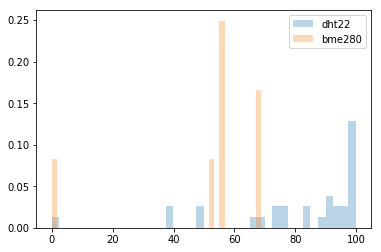

In [69]:
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

# plt.hist( humidity_values, **kwargs ) 
plt.hist( humidity_values__dht22, **kwargs, label='dht22' ) 
plt.hist( humidity_values__bme280, **kwargs, label='bme280' ) 
plt.legend();

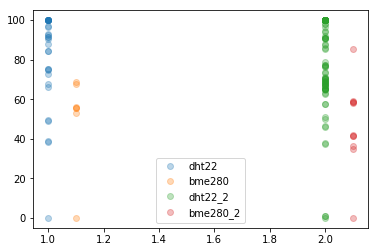

In [70]:
# trying to do a ('simple') scatter plot

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.plot( np.ones( len( humidity_values__dht22) )*1, humidity_values__dht22, 'o', alpha=0.3, label='dht22' )
plt.plot( np.ones( len( humidity_values__bme280) )*1.1, humidity_values__bme280, 'o', alpha=0.3, label='bme280' )
plt.plot( np.ones( len( geographic_search_humidity_sensor__dht22__sensor_value) )*2, geographic_search_humidity_sensor__dht22__sensor_value, 'o', alpha=0.3, label='dht22_2' )
plt.plot( np.ones( len( geographic_search_humidity_sensor__bme280__sensor_value) )*2.1, geographic_search_humidity_sensor__bme280__sensor_value, 'o', alpha=0.3, label='bme280_2' )
plt.legend();